# Simple Linear Regression Project
In this project the dataset contained in the .csv file "Salary_Data.csv" will be used; it's made of 30 observations and 2 columns: Salary (the target variable I want to predict) and YearsExperience (the only predictor variable available). 

In these first lines I'm going to load the dataset and the required libraries.

In [31]:
# Libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exploratory analysis of the data
In this section I'm going to understand more the data I'm working on, trying to extrapolate as much crucial informations I can.

In [33]:
# Descriptive statistics
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


The following boxplots tell in a glance how the data are distributed, it's possible to notice that 50% of the people considered have less than 5 years of experience, so there's a young core. As we may expect the salary is similarly distributed with highest tops corresponding to the most experienced workers.

<AxesSubplot:ylabel='Salary'>

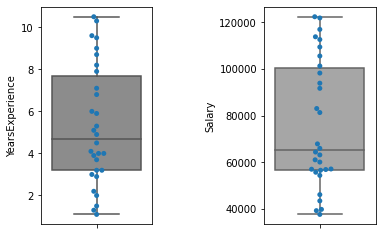

In [34]:
#data.boxplot(column = "YearsExperience")
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(wspace=1)

sns.boxplot(y = data["YearsExperience"], color = ".55", ax = ax[0])
sns.swarmplot(y = data["YearsExperience"], ax = ax[0])

sns.boxplot(y = data["Salary"], color = ".65", ax = ax[1])
sns.swarmplot(y = data["Salary"], ax = ax[1])

Now I'm going to compute the Pearson correlation in order to see how linked are the two variables:

as it's easy to notice the variables are positively correlated, indeed we get a coefficient of 0.97 with a p-value way smaller than 0.05

In [35]:
res = stats.pearsonr(data["YearsExperience"], data["Salary"])
print(f"Coeff = {res[0]}, p-value = {res[1]}")

Coeff = 0.9782416184887599, p-value = 1.1430681092271564e-20


Before building the model, I'll make a Regression plot and a Residuals plot in order to visualize how good a linear Linear Regression can describe the relationship between the two variables.

The regression line drawn with respect to the points in the feature space and the fact that the residuals are equally distributed along the x-axis suggests that a linear regression model will be doing pretty fine.

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

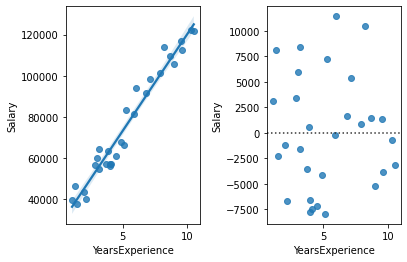

In [36]:
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(wspace = .5)

sns.regplot(x = "YearsExperience", y = "Salary", data = data, ax = ax[0])
sns.residplot(x = data["YearsExperience"], y = data["Salary"])

# Linear Regression model

In [38]:
def rse(y_true, y_pred, degrees_freedom):
    '''
    This function computes the Residual Standard Error
    of a given regression model output.
    RSE = sqrt(residuals ^ 2 / degrees_of_freedom)
    '''

    residuals = y_true - y_pred
    residuals = residuals.sum() ** 2

    return np.sqrt(residuals / degrees_freedom)

In [43]:
train, test = train_test_split(data, test_size = 0.3, shuffle = True)
train, validation = train_test_split(train, test_size = 0.2, shuffle = True)

lm = LinearRegression()
# Fit the model
lm.fit(train["YearsExperience"].to_numpy().reshape(-1, 1), train["Salary"])
# Predict and evaluate
y_pred = lm.predict(test["YearsExperience"].to_numpy().reshape(-1, 1))
r_squared = r2_score(test["Salary"], y_pred)
RSE = rse(test["Salary"],
          y_pred,
          test.shape[0] - 2)

print(f"Model created:\nSlope = {lm.coef_}, Intercept = {lm.intercept_}\nR-Squared = {r_squared}\nRSE = {RSE}")
    

Model created:
Slope = [9590.70452459], Intercept = 24316.14088691237
R-Squared = 0.9743020588630446
RSE = 1090.0018565183548


Let's draw now a plot showing the differences between the True Values from the dataset and the ones predicted by the regression model obtained:

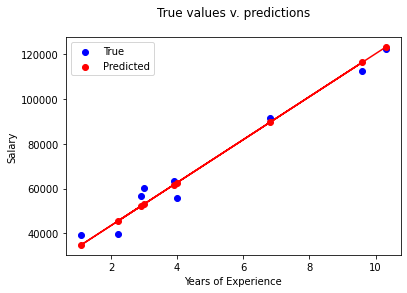

In [52]:
fig, ax = plt.subplots(1, 1)
s1 = ax.scatter(test["YearsExperience"], test["Salary"], color = "blue")
s2 = ax.scatter(test["YearsExperience"], y_pred, color = "red")
ax.plot(test["YearsExperience"], y_pred, color = "red")
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Salary")
ax.set_title("True values v. predictions\n")
plt.legend([s1, s2], ["True", "Predicted"]);